### Import required Libraries

In [1]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import time

In [2]:
output=r'C:\Users\GREESHMANTH\Desktop\Major Project\Code\Data_split'
OUTPUT_DIR = output
test_data_dir = f"{OUTPUT_DIR}/test"
IMG_HEIGHT, IMG_WIDTH = (224, 224)

In [3]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode="categorical")

Found 106 images belonging to 5 classes.


In [4]:
def load_model(path):
    model = keras.models.load_model(path)
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"])
    return model

In [5]:
# path=r"C:\Users\GREESHMANTH\Desktop\unittests\model.h5"
vgg16 = r"C:\Users\GREESHMANTH\Desktop\Major Project\Models\VGG16.h5"
efficientnet = r"C:\Users\GREESHMANTH\Desktop\Major Project\Models\EfficientNet.h5"
inceptionv3 = r"C:\Users\GREESHMANTH\Desktop\Major Project\Models\InceptionV3.h5"
renet50 = r"C:\Users\GREESHMANTH\Desktop\Major Project\Models\ResNet50.h5"


In [6]:
vggmodel=load_model(vgg16)
effmodel=load_model(efficientnet)
incmodel=load_model(inceptionv3)
resmodel=load_model(renet50)

In [10]:
test_loss, test_acc = vggmodel.evaluate(test_generator, verbose=2)
print(test_acc)

test_loss, test_acc = effmodel.evaluate(test_generator, verbose=2)
print(test_acc)

test_loss, test_acc = incmodel.evaluate(test_generator, verbose=2)
print(test_acc)

test_loss, test_acc = resmodel.evaluate(test_generator, verbose=2)
print(test_acc)

106/106 - 28s - loss: 0.3927 - accuracy: 0.8491 - 28s/epoch - 260ms/step
0.849056601524353
106/106 - 65s - loss: 0.2355 - accuracy: 0.9057 - 65s/epoch - 617ms/step
0.9056603908538818
106/106 - 10s - loss: 0.6288 - accuracy: 0.8019 - 10s/epoch - 95ms/step
0.801886796951294
106/106 - 21s - loss: 0.1946 - accuracy: 0.9434 - 21s/epoch - 194ms/step
0.9433962106704712


In [7]:
word_dict = {0:'Banana',1:'Coconut',2:'Maize',3:'Sugarcane',4:'Wheat'}

In [8]:
def predict(imagePath):
    test_image = image.load_img(imagePath, target_size = (224,224)) 
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    
    st = time.time()
    result1 = vggmodel.predict(test_image)
    et = time.time()
    result1 = word_dict[np.argmax(result1)]
    time1= et-st
    
    st = time.time()
    result2 = effmodel.predict(test_image)
    et = time.time()
    result2 = word_dict[np.argmax(result2)]
    time2= et-st
    
    st = time.time()
    result3 = incmodel.predict(test_image)
    et = time.time()
    result3 = word_dict[np.argmax(result3)]
    time4= et-st
    
    st = time.time()
    result4 = resmodel.predict(test_image)
    et = time.time()
    result4 = word_dict[np.argmax(result4)]
    time3= et-st

    print("VGG16")
    print("The predicted monocot is ", result1)
    print("The response time in seconds is ", time1)
    print()
    print("EfficientNet")
    print("The predicted monocot is ", result2)
    print("The response time in seconds is ", time2)
    print()
    print("InceptionV3")
    print("The predicted monocot is ", result3)
    print("The response time in seconds is ", time3)
    print()
    print("ResNet50")
    print("The predicted monocot is ", result4)
    print("The response time in seconds is ", time4)

# Confusion Matrix

### VGG16

[[19  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 20  1  2]
 [ 0  0  2 15  1]
 [ 0  0  4  4 23]]


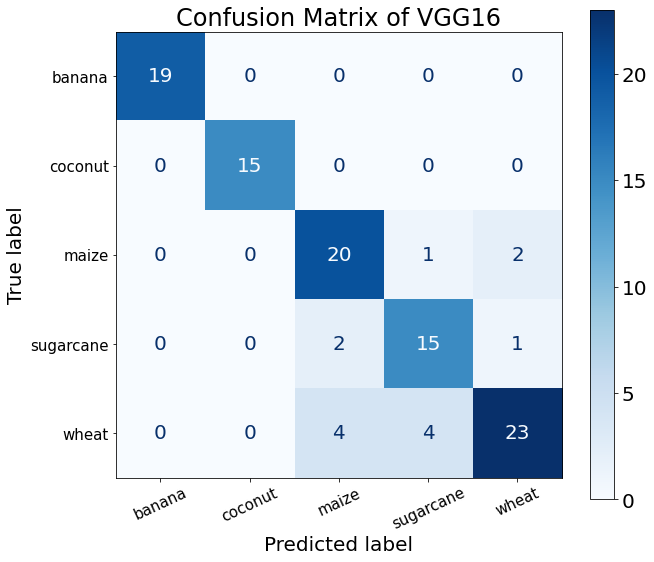

In [25]:
# Confusion Matrix
test_labels,test_predicted_labes=[],[]
for i in range(106):
    X,y = test_generator.next()
    y = np.argmax(y, axis=1)
    test_predicted_labes.append(np.argmax(vggmodel.predict(X)))
    test_labels.append(y[0])
    print(i,end='\r',flush=True)
# for i in range(861):
#     print(test_labels[i], test_predicted_labes[i])
c_m = confusion_matrix(test_labels,test_predicted_labes)
print(c_m)
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=test_generator.class_indices)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='Blues', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix of VGG16', fontsize=24)
# Saving plot
# plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

In [26]:
f1_score(test_labels,test_predicted_labes, average=None)

array([1.        , 1.        , 0.81632653, 0.78947368, 0.80701754])

In [27]:
print(classification_report(test_labels,test_predicted_labes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       0.77      0.87      0.82        23
           3       0.75      0.83      0.79        18
           4       0.88      0.74      0.81        31

    accuracy                           0.87       106
   macro avg       0.88      0.89      0.88       106
weighted avg       0.87      0.87      0.87       106



### EfficienetNet

[[17  1  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 26  1  1]
 [ 0  0  0 14  1]
 [ 0  1  2  1 26]]


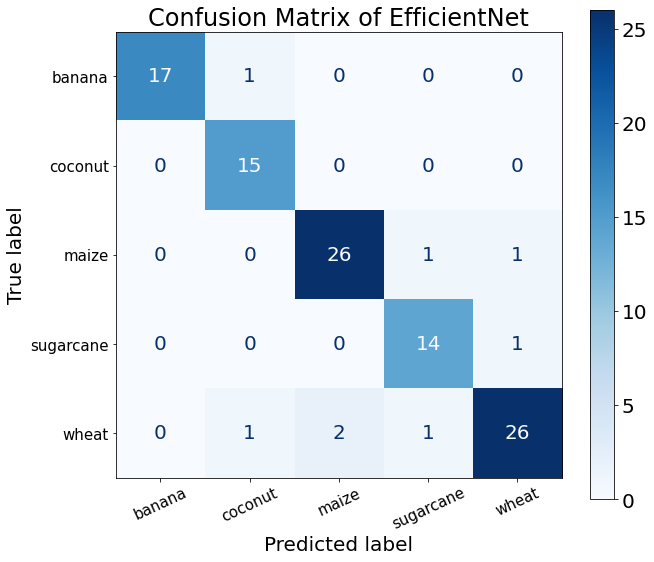

In [28]:
# Confusion Matrix
test_labels,test_predicted_labes=[],[]
for i in range(106):
    X,y = test_generator.next()
    y = np.argmax(y, axis=1)
    test_predicted_labes.append(np.argmax(effmodel.predict(X)))
    test_labels.append(y[0])
    print(i,end='\r',flush=True)
# for i in range(861):
#     print(test_labels[i], test_predicted_labes[i])
c_m = confusion_matrix(test_labels,test_predicted_labes)
print(c_m)
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=test_generator.class_indices)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='Blues', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix of EfficientNet', fontsize=24)
# Saving plot
# plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

In [29]:
f1_score(test_labels,test_predicted_labes, average=None)

array([0.97142857, 0.9375    , 0.92857143, 0.90322581, 0.89655172])

In [30]:
print(classification_report(test_labels,test_predicted_labes))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.88      1.00      0.94        15
           2       0.93      0.93      0.93        28
           3       0.88      0.93      0.90        15
           4       0.93      0.87      0.90        30

    accuracy                           0.92       106
   macro avg       0.92      0.93      0.93       106
weighted avg       0.93      0.92      0.92       106



### InceptionV3

[[21  0  1  0  0]
 [ 2  7  0  0  0]
 [ 0  1 14  1  3]
 [ 5  2  1 15  0]
 [ 1  0  0  2 30]]


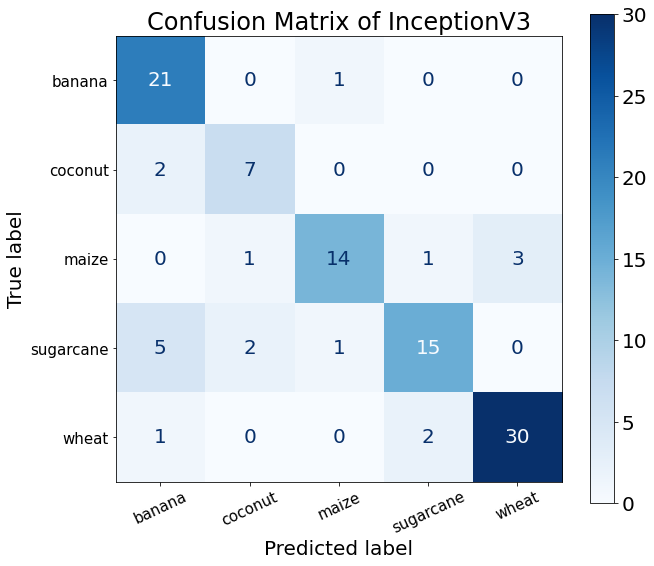

In [31]:
# Confusion Matrix
test_labels,test_predicted_labes=[],[]
for i in range(106):
    X,y = test_generator.next()
    y = np.argmax(y, axis=1)
    test_predicted_labes.append(np.argmax(incmodel.predict(X)))
    test_labels.append(y[0])
    print(i,end='\r',flush=True)
# for i in range(861):
#     print(test_labels[i], test_predicted_labes[i])
c_m = confusion_matrix(test_labels,test_predicted_labes)
print(c_m)
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=test_generator.class_indices)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='Blues', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix of InceptionV3', fontsize=24)
# Saving plot
# plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

In [35]:
f1_score(test_labels,test_predicted_labes, average=None)

array([0.82352941, 0.73684211, 0.8       , 0.73170732, 0.90909091])

In [36]:
print(classification_report(test_labels,test_predicted_labes))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.70      0.78      0.74         9
           2       0.88      0.74      0.80        19
           3       0.83      0.65      0.73        23
           4       0.91      0.91      0.91        33

    accuracy                           0.82       106
   macro avg       0.81      0.81      0.80       106
weighted avg       0.83      0.82      0.82       106



### ResNet50

[[18  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 20  3  2]
 [ 0  0  1 16  0]
 [ 0  0  0  0 33]]


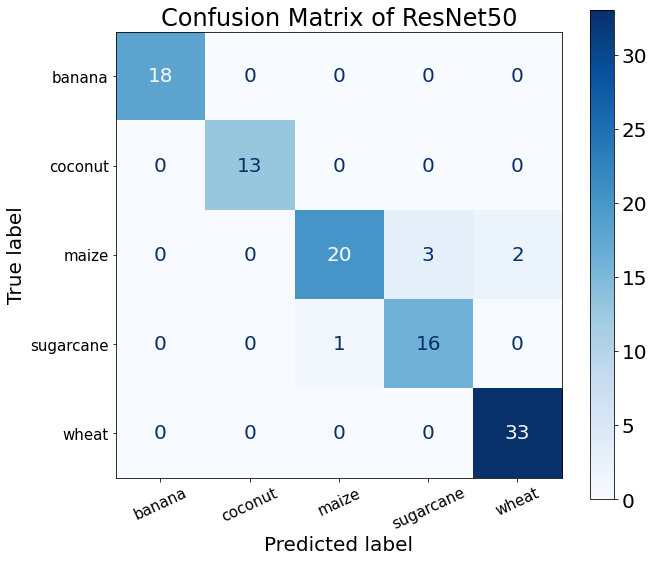

In [38]:
# Confusion Matrix
test_labels,test_predicted_labes=[],[]
for i in range(106):
    X,y = test_generator.next()
    y = np.argmax(y, axis=1)
    test_predicted_labes.append(np.argmax(resmodel.predict(X)))
    test_labels.append(y[0])
    print(i,end='\r',flush=True)
# for i in range(861):
#     print(test_labels[i], test_predicted_labes[i])
c_m = confusion_matrix(test_labels,test_predicted_labes)
print(c_m)
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=test_generator.class_indices)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='Blues', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix of ResNet50', fontsize=24)
# Saving plot
# plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

In [39]:
f1_score(test_labels,test_predicted_labes, average=None)

array([1.        , 1.        , 0.86956522, 0.88888889, 0.97058824])

In [40]:
print(classification_report(test_labels,test_predicted_labes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        13
           2       0.95      0.80      0.87        25
           3       0.84      0.94      0.89        17
           4       0.94      1.00      0.97        33

    accuracy                           0.94       106
   macro avg       0.95      0.95      0.95       106
weighted avg       0.95      0.94      0.94       106



# Sample Image Input

In [21]:
imagepath=r"C:\Users\GREESHMANTH\Desktop\Major Project\Code\Dataset\banana\banana_2.png"
predict(imagepath)

VGG16
The predicted monocot is  Banana
The response time in seconds is  0.28023862838745117

EfficientNet
The predicted monocot is  Banana
The response time in seconds is  0.46091485023498535

InceptionV3
The predicted monocot is  Sugarcane
The response time in seconds is  0.2392411231994629

ResNet50
The predicted monocot is  Banana
The response time in seconds is  0.11611151695251465
